In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer
from neuralplayground.plotting.plot_utils import make_plot_trajectories , make_plot_rate_map, make_agent_comparison

# Different Agents in Same env


## 2D env

Dataframe with recordings


/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:110: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig13'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

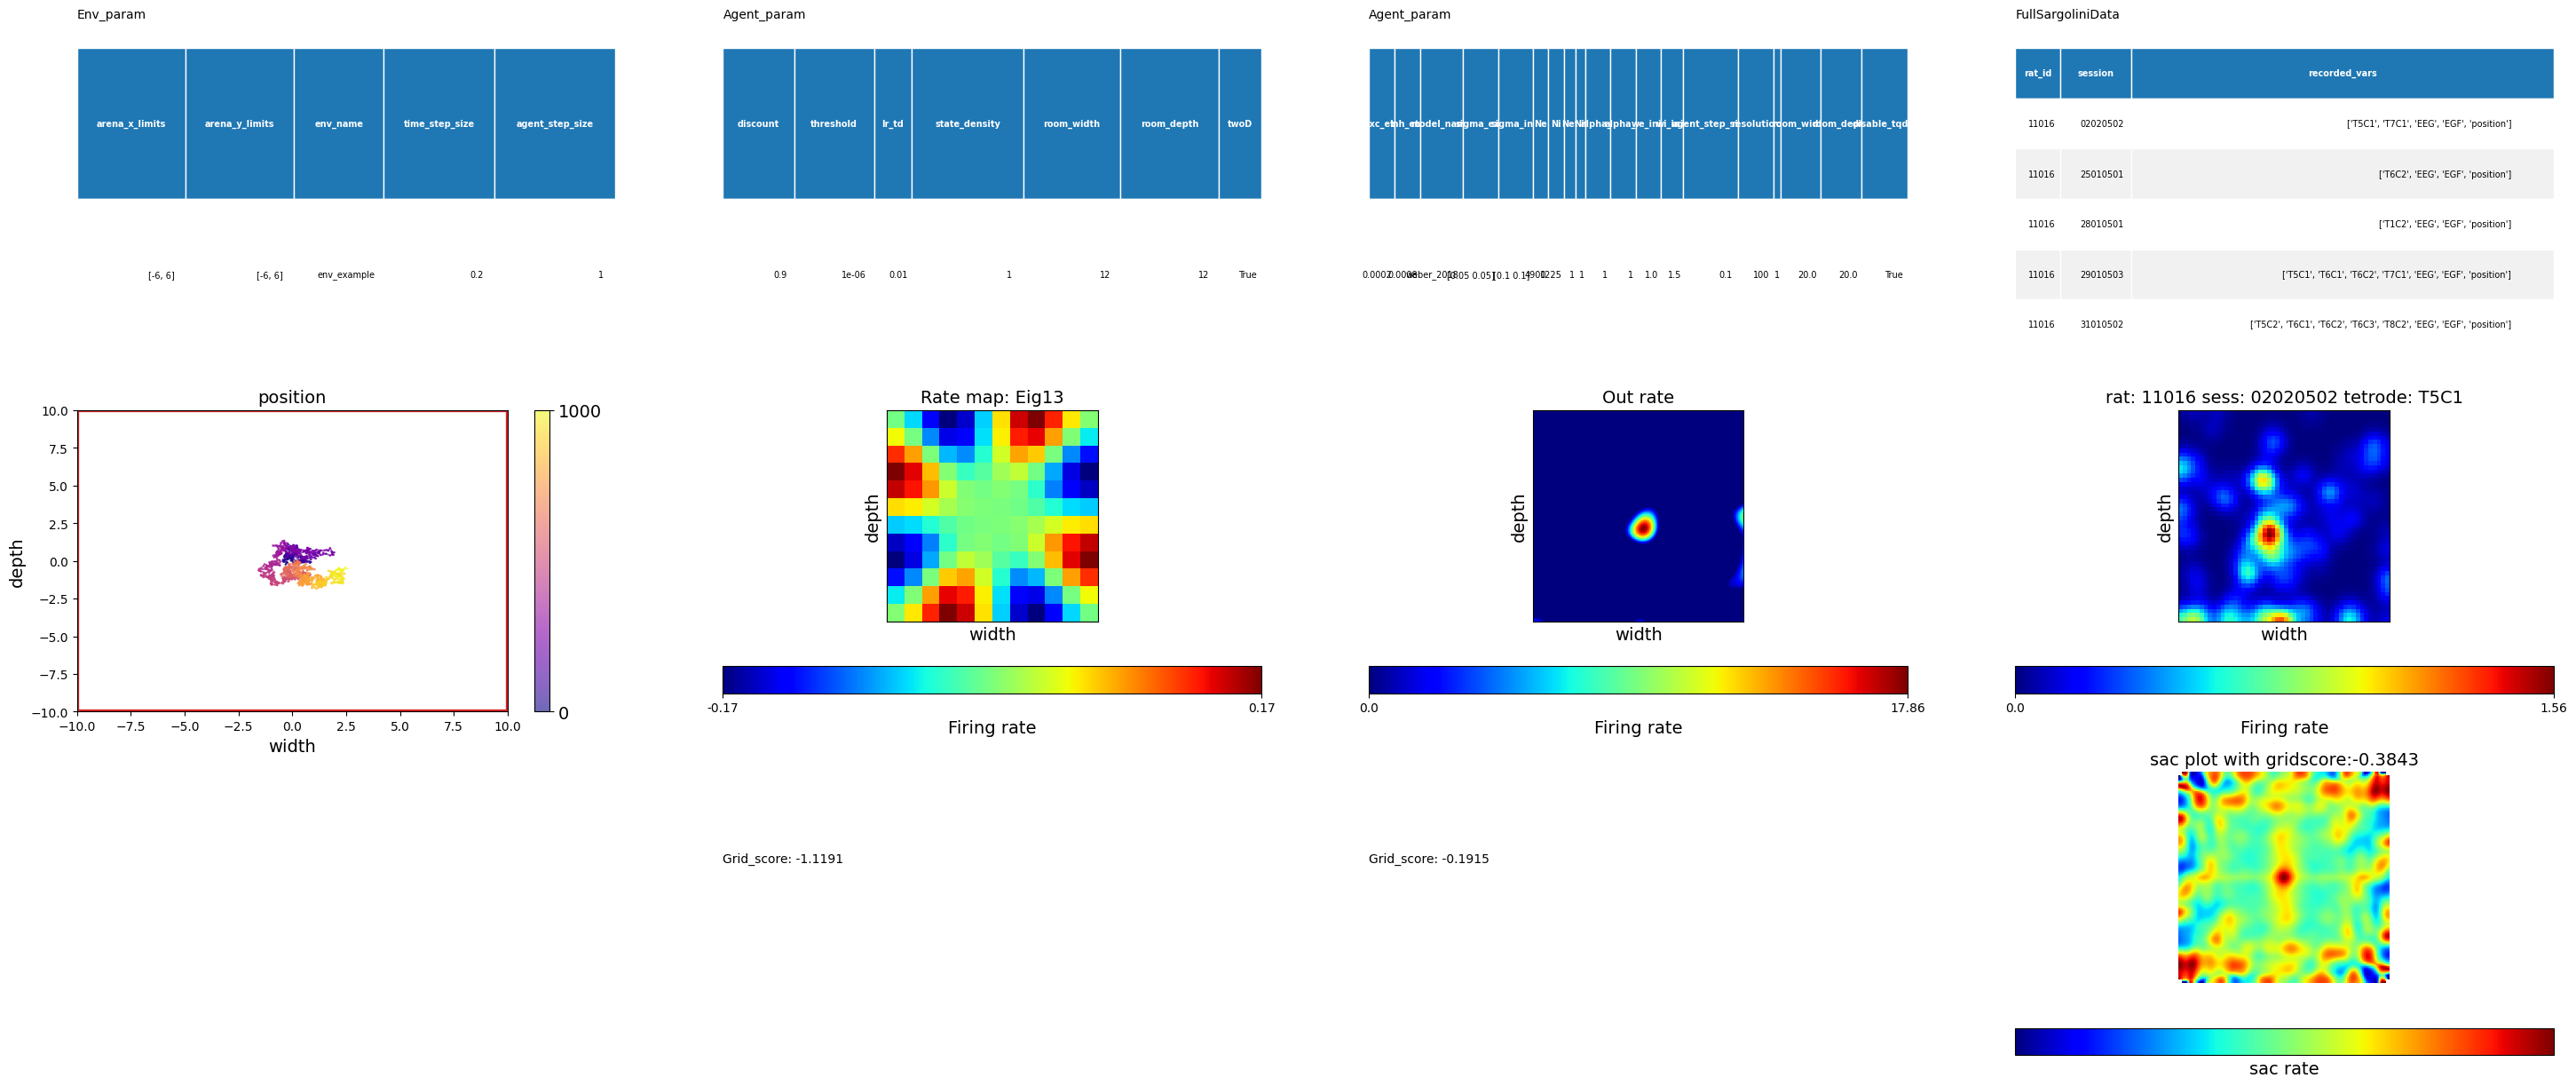

In [2]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_12-07-2023_13-46-46-513/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_12-07-2023_13-46-46-513/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_12-07-2023_13-46-46-513/arena"

agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/arena"


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]
exp=[exp]

make_agent_comparison(env, parameters,agents, exps=exp , recording_index=0,GridScorer=GridScorer)


## Sargolini env

Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:110: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: divide by zero encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig13'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >]], dtype=object)

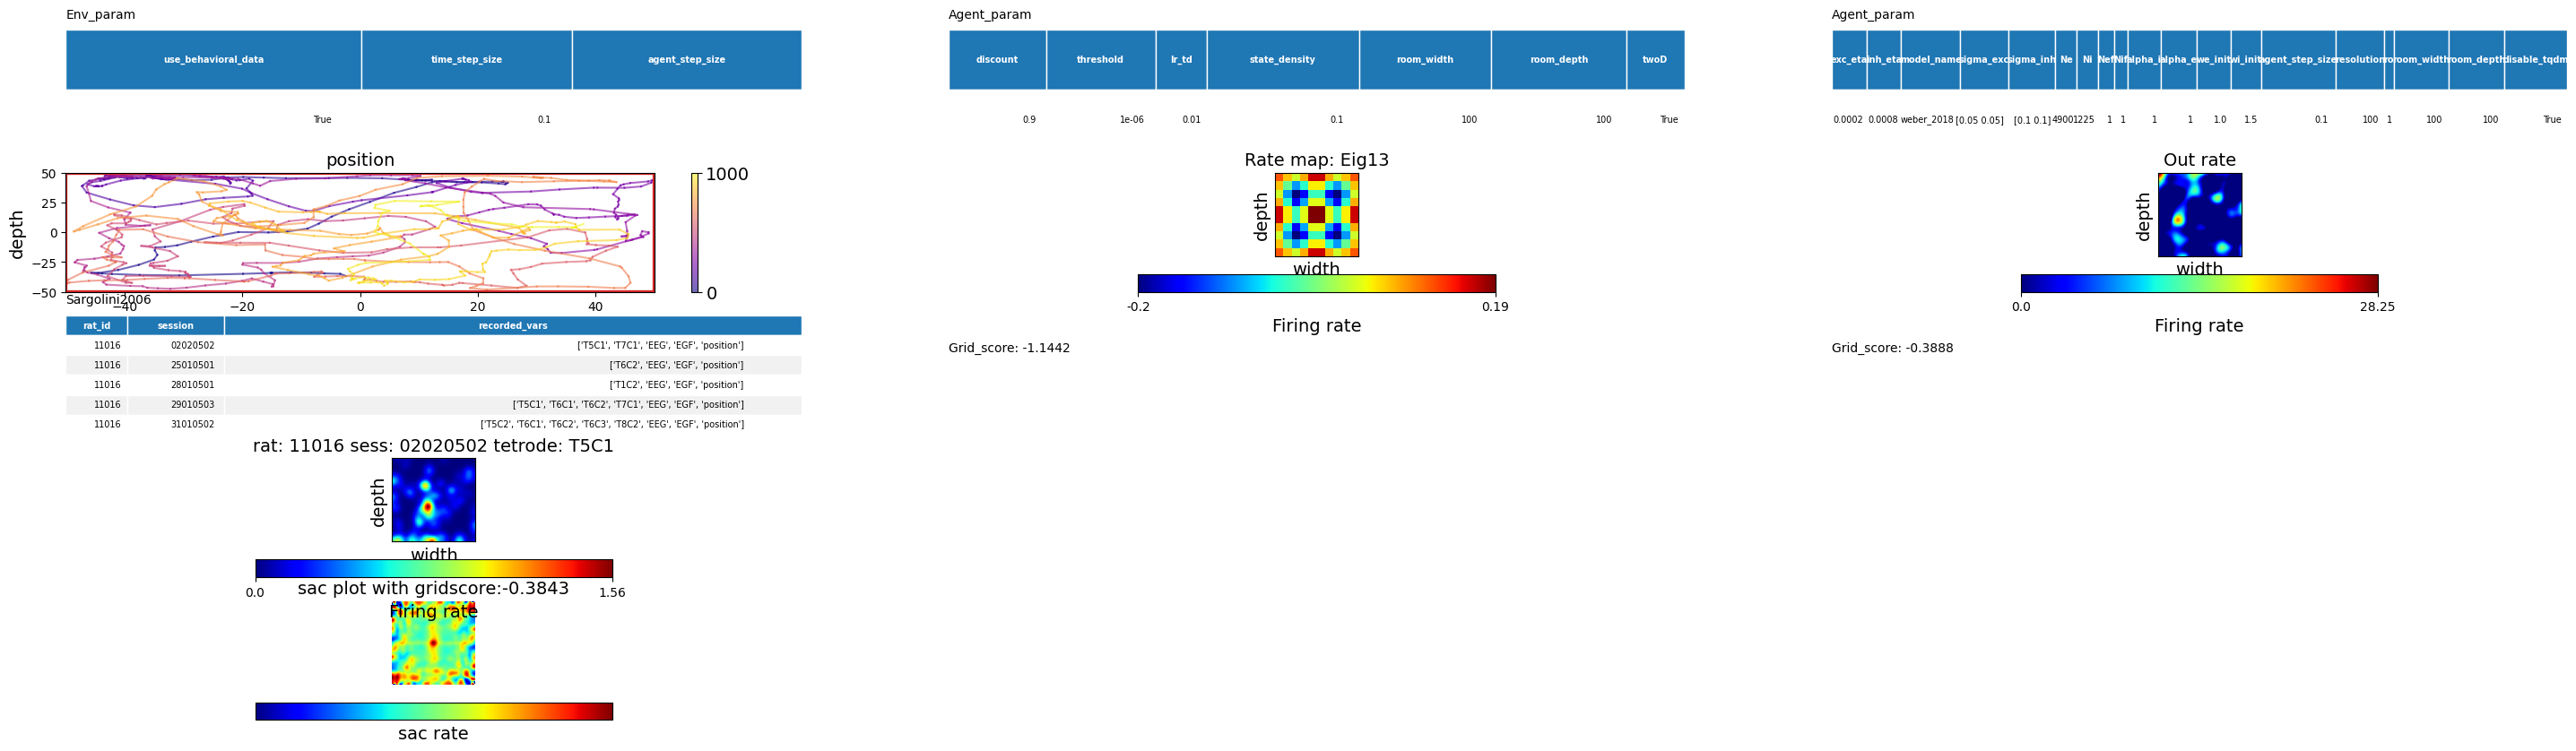

In [3]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_14-07-2023_17-20-16-397/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_14-07-2023_17-20-16-397/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_14-07-2023_17-20-16-397/arena"


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_15-07-2023_11-24-54-217/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_15-07-2023_11-24-54-217/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_15-07-2023_11-24-54-217/arena"


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]

make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


## Hafting env

Dataframe with recordings


/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:110: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


,rat_id,session,recorded_vars
rec_index,,,
0,11015,13120410,"[EEG, position, t5c1]"
1,11265,13030610,"[EEG, EG2, position, t5c1, t8c2]"
2,11265,15020610,"[EEG, position, t3c2, t7c1]"
3,11265,16030611,"[EEG, EG2, position, t4c1, t4c2, t4c4]"
4,11340,01120511,"[EEG, EG2, position, t7c1]"
5,11343,16120511,"[EEG, EG2, position, t1c1]"
6,11607,02110610,"[EEG, EG2, position, t8c1]"
7,11607,28110611,"[EEG, EG2, EG3, EG4, position, t6c2]"
8,11647,09010715,"[EEG, EG2, EG3, EG4, position, t8c1]"


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:0.0098'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

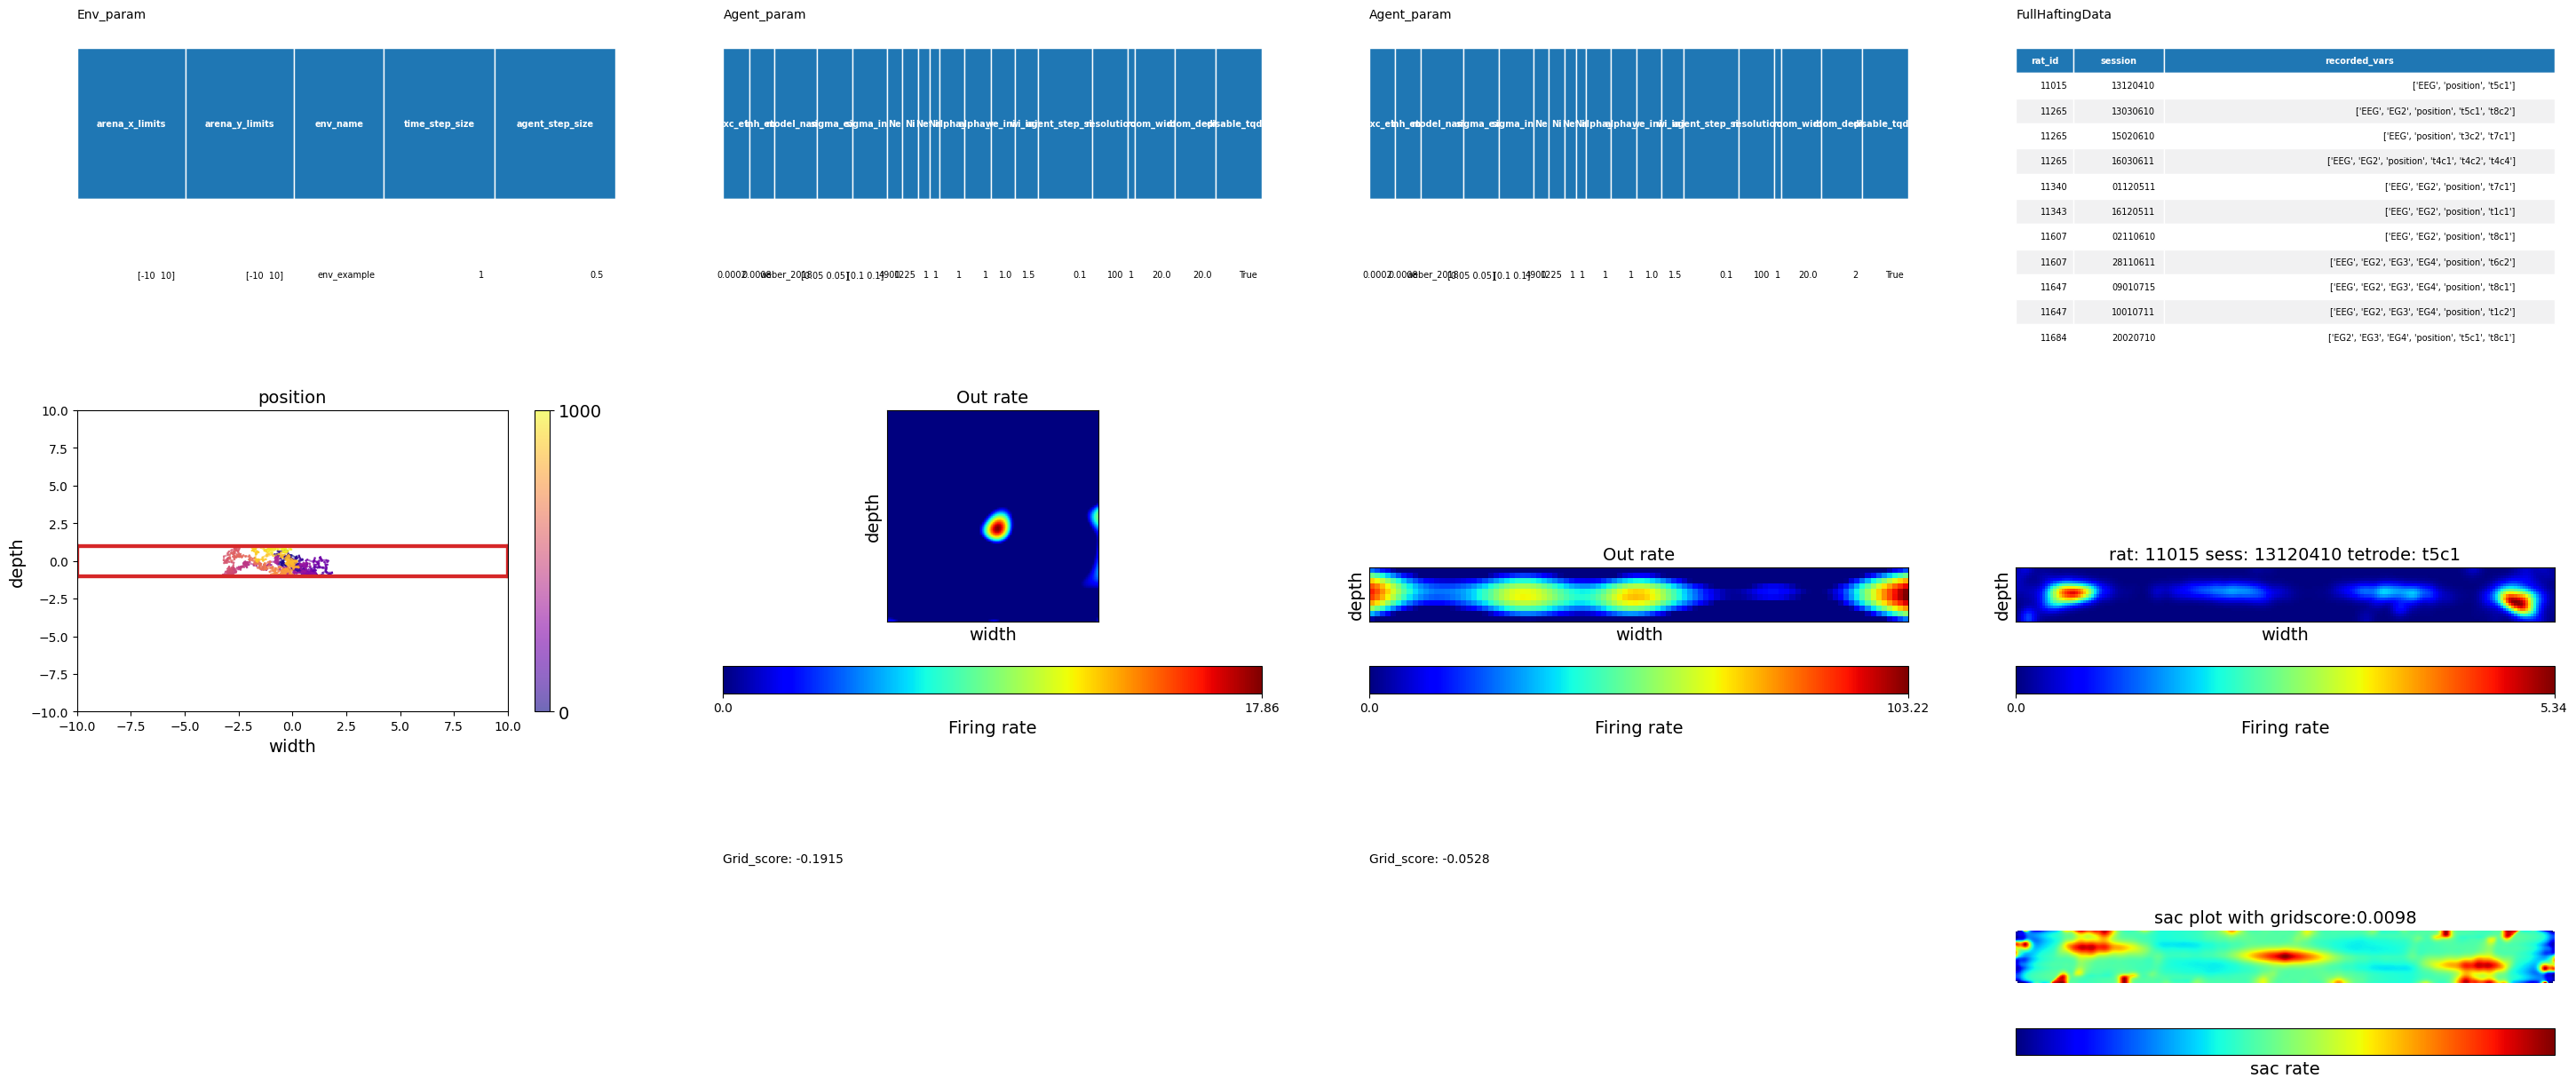

In [4]:



agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/arena"


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)


agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_4_12-07-2023_13-46-46-515/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_4_12-07-2023_13-46-46-515/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_4_12-07-2023_13-46-46-515/arena"


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)

agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Hafting2008Data(verbose=False)
env=[env]
exp=[exp]

make_agent_comparison(env, parameters,agents, exps=exp , recording_index=0,GridScorer=GridScorer)



## Wernle 

# Train same agent in Different envs


## Weber

/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


Dataframe with recordings


/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:110: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: divide by zero encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sess_index_0_merged'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>,
        <Axes: titl

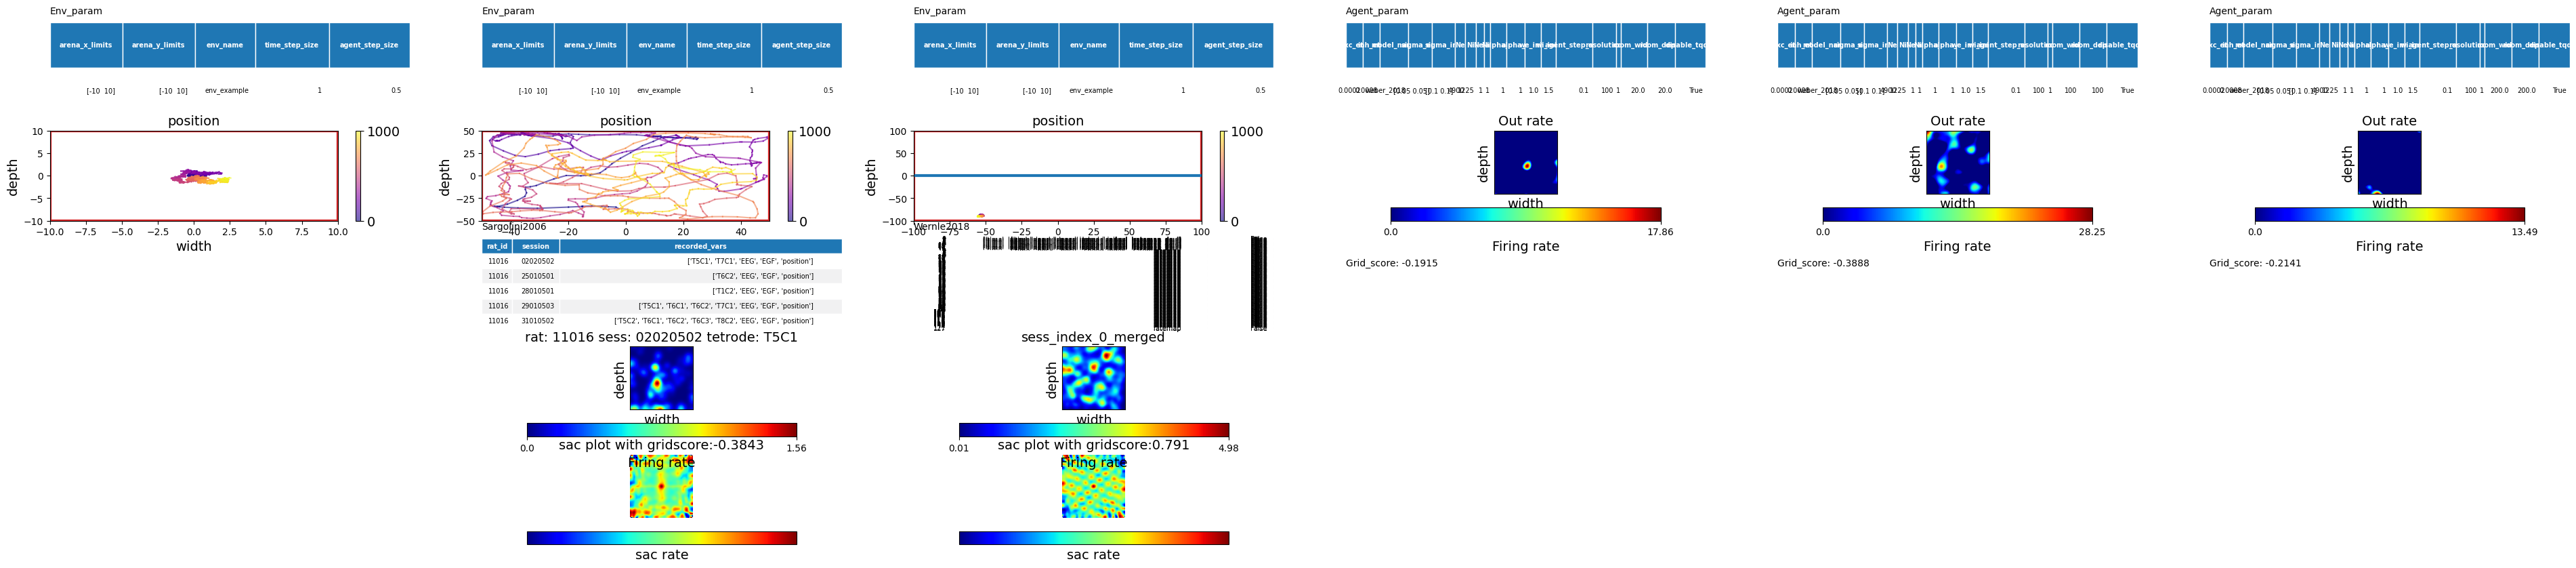

In [12]:
# Different Seed
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_4_12-07-2023_13-46-46-512/arena"


agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)

# Different Seed
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_4_12-07-2023_13-46-46-515/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_4_12-07-2023_13-46-46-515/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Haftinglike/run_4_12-07-2023_13-46-46-515/arena"


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)

# Different Env
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_15-07-2023_11-24-54-217/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_15-07-2023_11-24-54-217/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_15-07-2023_11-24-54-217/arena"

env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)




agents=[agent_2d,agent,agent_H]
parameters=[param_2d,param,param_H]
env=[env_2d,env, env_H]



make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)




## Stackenfeld

Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig13'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig13'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >]], dtype=object)

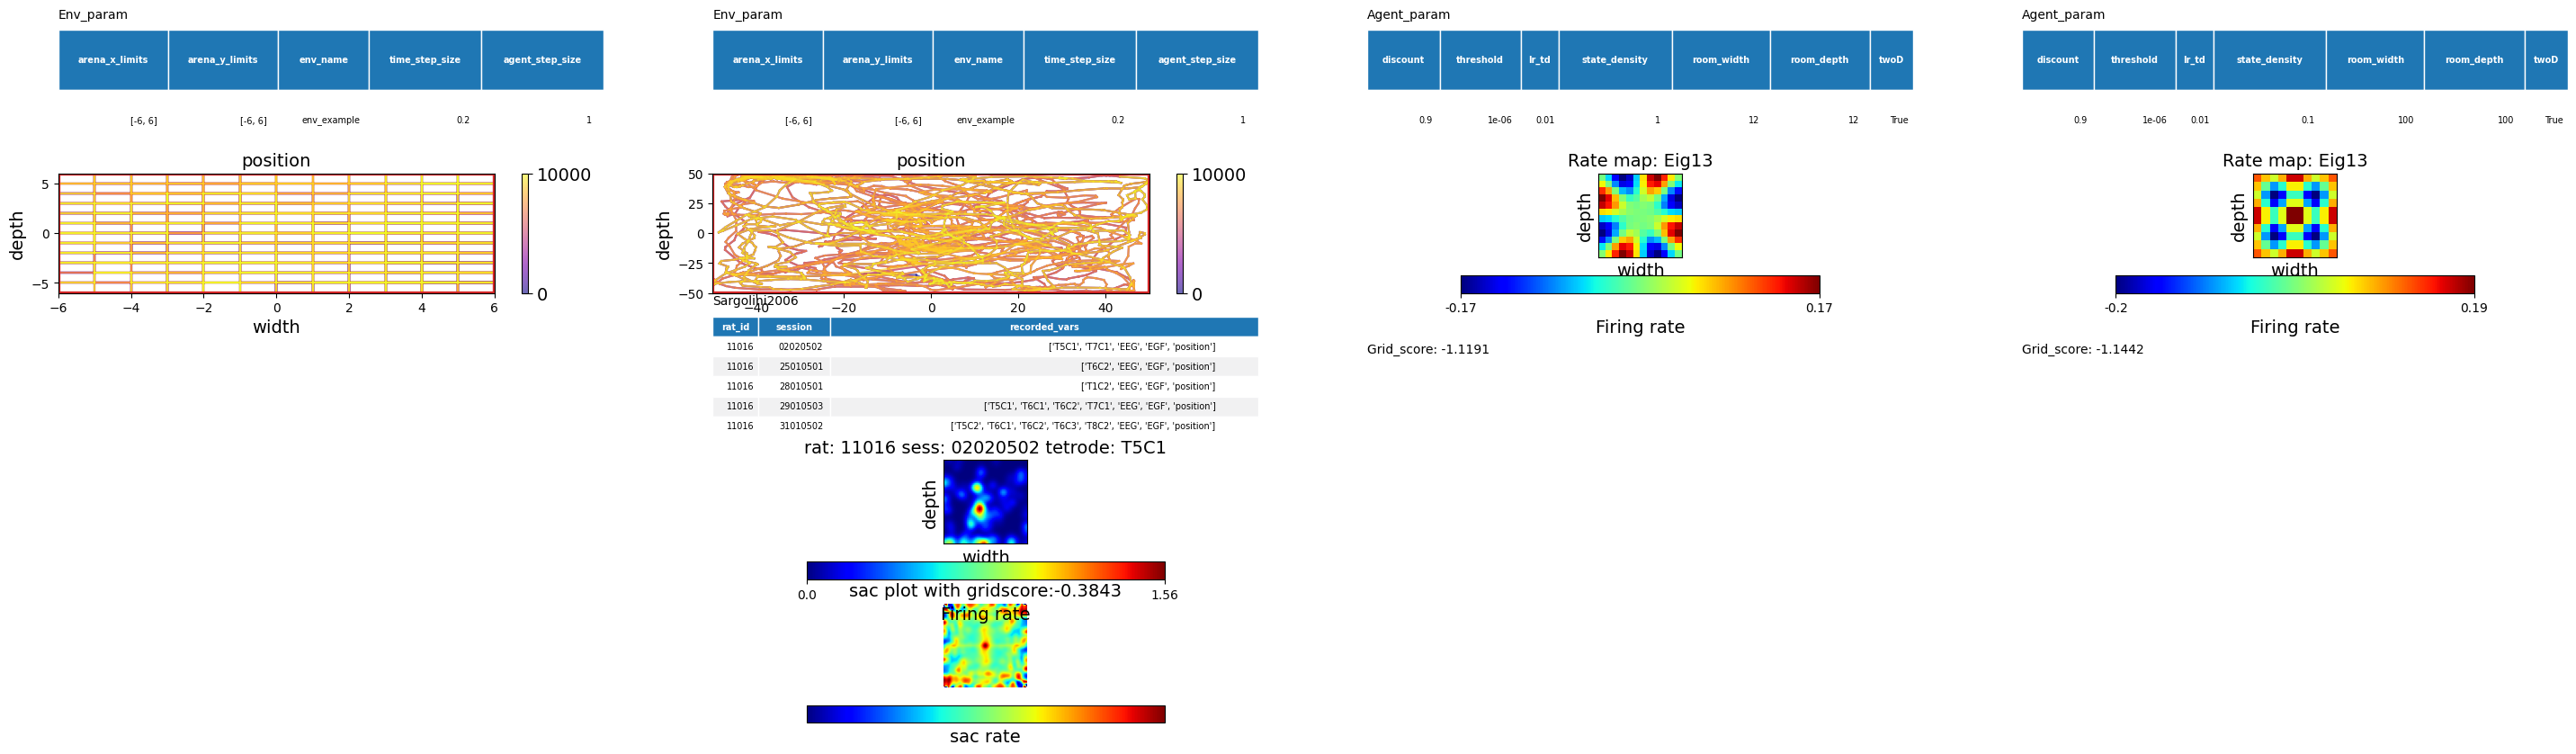

In [14]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_12-07-2023_13-46-46-513/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_12-07-2023_13-46-46-513/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_4_12-07-2023_13-46-46-513/arena"

agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)


agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_14-07-2023_17-20-16-397/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_14-07-2023_17-20-16-397/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_14-07-2023_17-20-16-397/arena"


agent_S = pd.read_pickle(agent_path)
param_S = pd.read_pickle(param_path)
env_S = pd.read_pickle(arena_path)


agents=[agent_2d,agent_S]
parameters=[param_2d,param_S]
env=[env_2d,env_S]


make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


# Merging Room environment


Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sess_index_0_merged'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:0.791'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

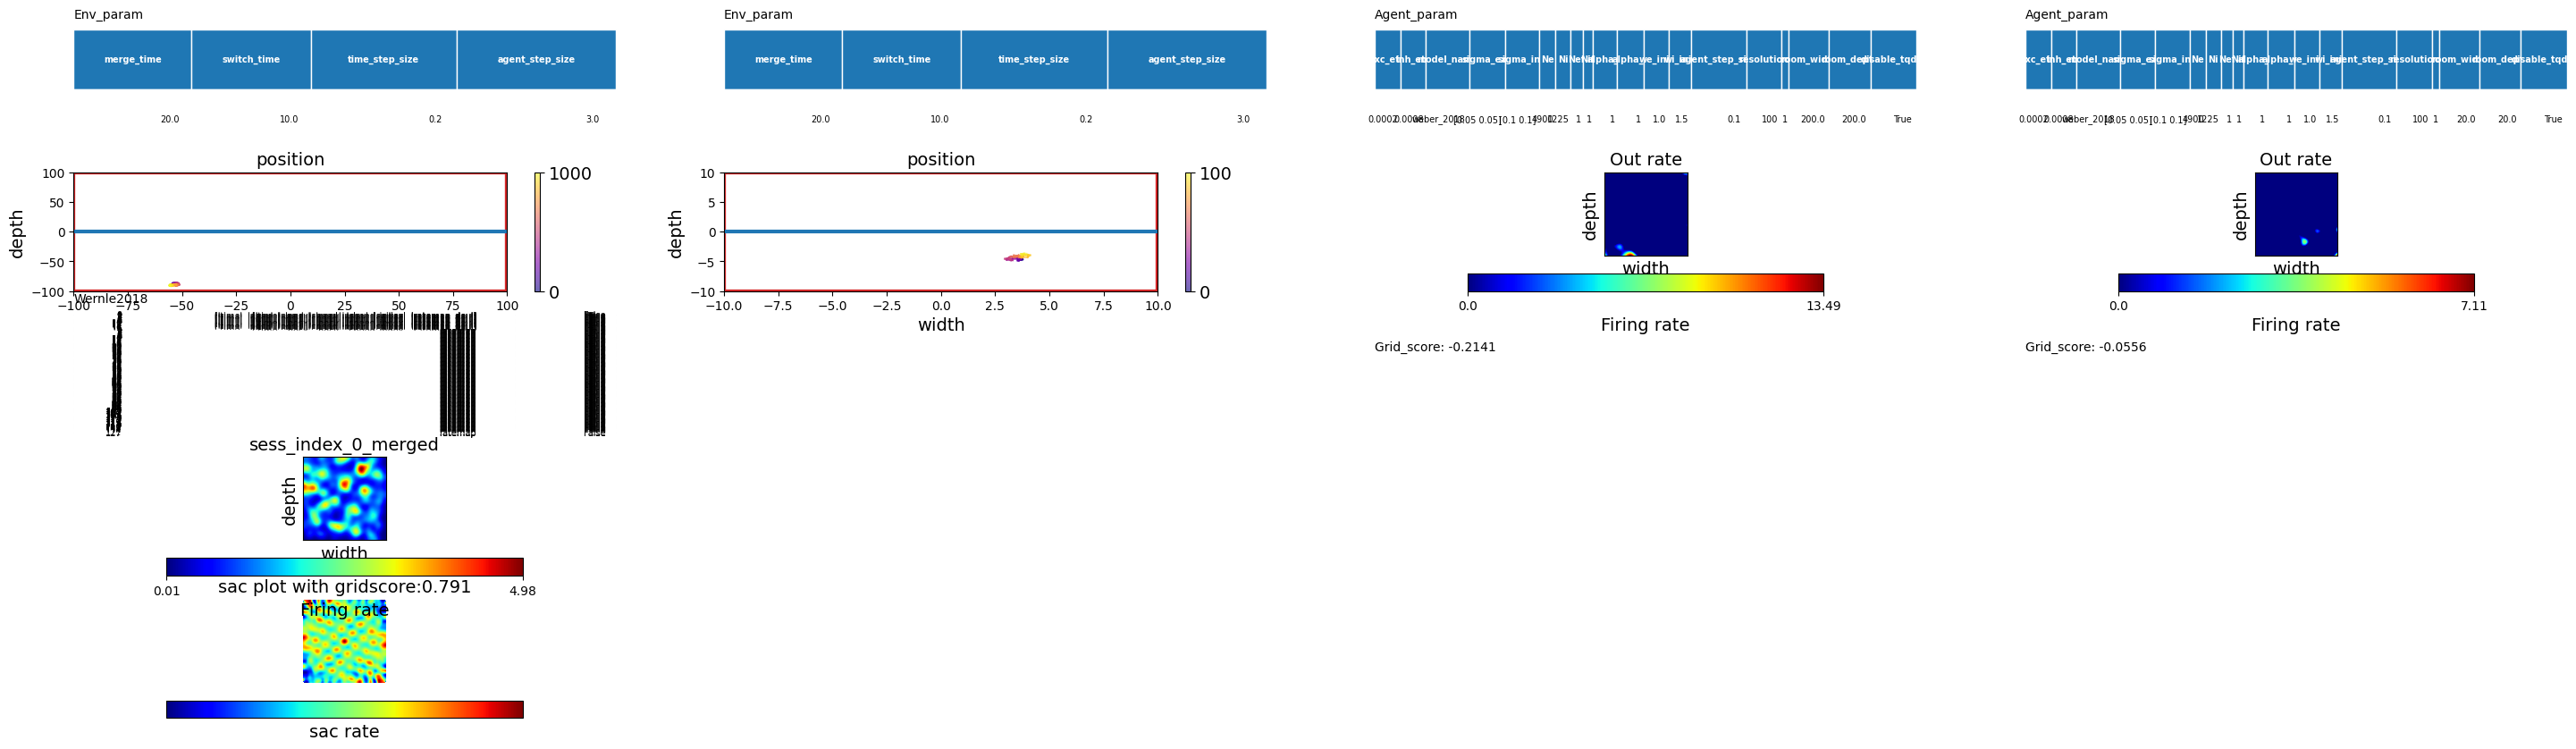

In [15]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/arena"



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


# Different Env
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_19-07-2023_18-10-27-795/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_19-07-2023_18-10-27-795/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_19-07-2023_18-10-27-795/arena"

agent_W = pd.read_pickle(agent_path)
param_W = pd.read_pickle(param_path)
env_W = pd.read_pickle(arena_path)


agents=[agent_W,agent]
parameters=[param_W,param]
env=[env_W, env]
make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)






